In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


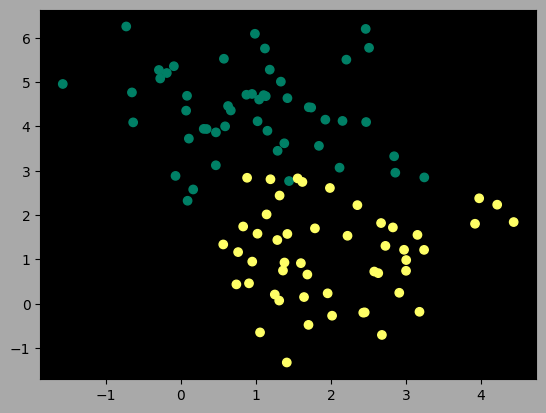

In [75]:

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('Dimensions de X:', X.shape)
print('Dimensions de y:', y.shape)

fig, ax = plt.subplots()

fig.patch.set_facecolor('darkgrey')
ax.set_facecolor('black')  

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [72]:
def initilisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
    

In [88]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [89]:
#Fonction coût
def log_loss(A , y):
    #len(y) = 100 
    return 1/ len(y) * np.sum(-y * np.log(A) - (1 - y ) * np.log(1 - A))

In [92]:
log_loss(A, y )

NameError: name 'log_loss' is not defined